In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('titanic.csv')

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Male vs. Feamale passangers')

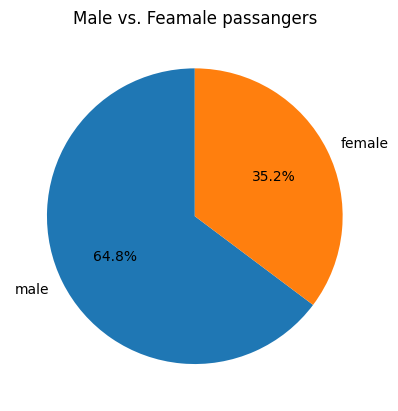

In [27]:
gender_count = df['Sex'].value_counts()

plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Male vs. Feamale passangers')

Text(0.5, 1.0, 'Distribution of Passenger Ages')

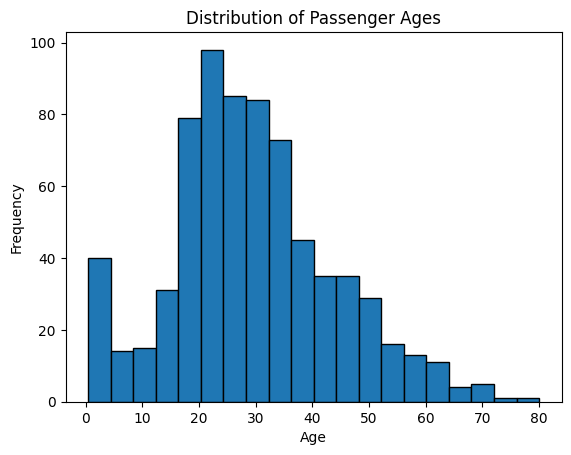

In [28]:
plt.hist(df['Age'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Ages')

Text(0.5, 1.0, 'Survival Counts')

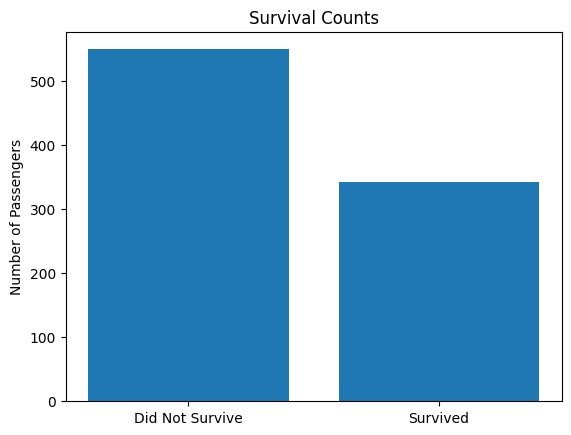

In [29]:
survival_counts = df['Survived'].value_counts()

plt.bar(survival_counts.index, survival_counts.values)
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.ylabel('Number of Passengers')
plt.title('Survival Counts')

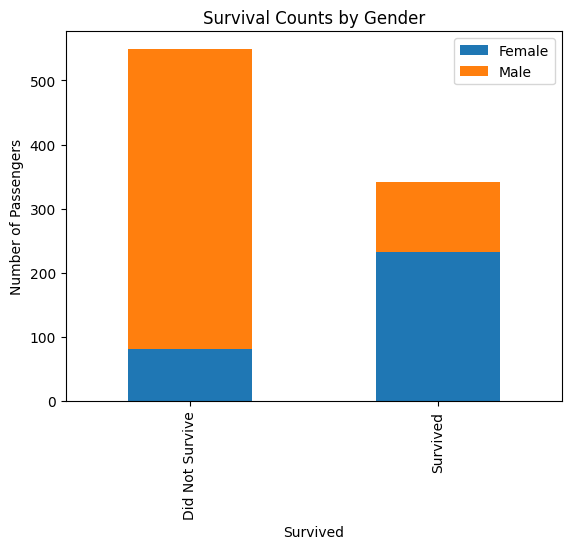

In [30]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
survival_gender_counts = df.groupby(['Survived', 'Sex_male']).size().unstack()
survival_gender_counts.plot(kind='bar', stacked=True)

plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.ylabel('Number of Passengers')
plt.title('Survival Counts by Gender')
plt.legend(['Female', 'Male'])

Text(0.5, 1.0, 'Correlation between Fare and Age')

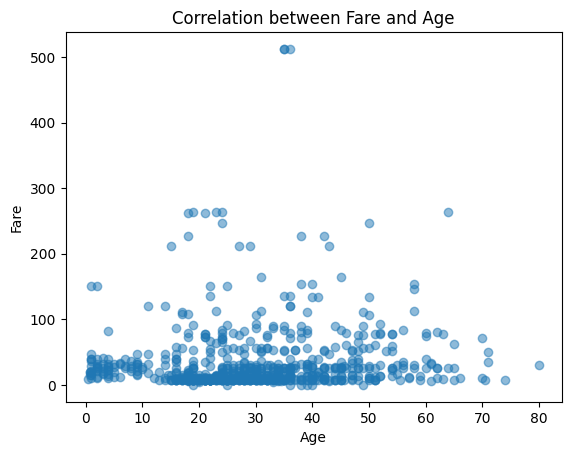

In [31]:
plt.scatter(df['Age'], df['Fare'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Correlation between Fare and Age')

In [34]:
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

# Normalize the 'Fare' column using min-max normalization
min_fare = df['Fare'].min()
max_fare = df['Fare'].max()
df['Fare'] = (df['Fare'] - min_fare) / (max_fare - min_fare)

# Convert 'Sex' column into numerical representation using one-hot encoding
df = pd.get_dummies(df, columns=['Sex_male'], drop_first=True)

# Print the preprocessed DataFrame
print(df.head())

   PassengerId  Survived  Pclass   
0            1         0       3  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch   
0                            Braund, Mr. Owen Harris  22.0      1      0  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket      Fare Cabin Embarked  Sex_male_True  
0         A/5 21171  0.014151   NaN        S           True  
1          PC 17599  0.139136   C85        C          False  
2  STON/O2. 3101282  0.015469   NaN        S          False  
3            113803  0.103644  C123        S          False  
4            373

In [37]:
survival_rate_gender = df.groupby('Sex_male_True')['Survived'].mean()
print("Survival Rate by Gender:")
print(survival_rate_gender)

# Calculate the survival rate for different passenger classes
survival_rate_class = df.groupby('Pclass')['Survived'].mean()
print("\nSurvival Rate by Passenger Class:")
print(survival_rate_class)

# Identify the passenger with the highest fare
passenger_highest_fare = df[df['Fare'] == df['Fare'].max()]
print("\nPassenger with the Highest Fare:")
print(passenger_highest_fare)

Survival Rate by Gender:
Sex_male_True
False    0.742038
True     0.188908
Name: Survived, dtype: float64

Survival Rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Passenger with the Highest Fare:
     PassengerId  Survived  Pclass                                Name   Age   
258          259         1       1                    Ward, Miss. Anna  35.0  \
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez  36.0   
737          738         1       1              Lesurer, Mr. Gustave J  35.0   

     SibSp  Parch    Ticket  Fare        Cabin Embarked  Sex_male_True  
258      0      0  PC 17755   1.0          NaN        C          False  
679      0      1  PC 17755   1.0  B51 B53 B55        C           True  
737      0      0  PC 17755   1.0         B101        C           True  


In [ ]:
print(df.columns)